In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras as k

f:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


##Loading the Dataset

In [4]:
train = r'F:\Study\Tslas-DESKTOP-G14D31O\Year 4\Sem 7\Online_courses\Deep-Learning\Data_sets\Masks\Train'
test = r'F:\Study\Tslas-DESKTOP-G14D31O\Year 4\Sem 7\Online_courses\Deep-Learning\Data_sets\Masks\Test'
valid = r'F:\Study\Tslas-DESKTOP-G14D31O\Year 4\Sem 7\Online_courses\Deep-Learning\Data_sets\Masks\Validation'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##Data-PreProcessing

In [6]:
datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [8]:
train_generator = datagen.flow_from_directory(
        train,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        valid,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


##Creating Model using VGG19

In [9]:
from keras.applications import VGG19

conv_base =  VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

In [10]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [10]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 22122049 (84.39 MB)
Trainable params: 22122049 (84.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

##Creating Checkpoint

In [13]:
checkpoint_cb = k.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

##Traing the model

In [14]:
history= model.fit(
    train_generator,
    steps_per_epoch=500,
    epochs=8,
    validation_data= validation_generator,
    validation_steps=40,
      callbacks=[checkpoint_cb]
)

Epoch 1/8
500/500 [==============================] - ETA: 0s - loss: 0.0720 - acc: 0.9712

f:\Anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


500/500 [==============================] - 3223s 6s/step - loss: 0.0720 - acc: 0.9712 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 2/8
500/500 [==============================] - 3181s 6s/step - loss: 0.0252 - acc: 0.9921 - val_loss: 0.0039 - val_acc: 1.0000
Epoch 3/8
500/500 [==============================] - 3177s 6s/step - loss: 0.0191 - acc: 0.9938 - val_loss: 0.0028 - val_acc: 0.9987
Epoch 4/8
500/500 [==============================] - 3194s 6s/step - loss: 0.0142 - acc: 0.9954 - val_loss: 4.2502e-04 - val_acc: 1.0000
Epoch 5/8
500/500 [==============================] - 3236s 6s/step - loss: 0.0111 - acc: 0.9968 - val_loss: 0.0068 - val_acc: 0.9975
Epoch 6/8
500/500 [==============================] - 3165s 6s/step - loss: 0.0088 - acc: 0.9973 - val_loss: 9.5861e-04 - val_acc: 0.9987
Epoch 7/8
500/500 [==============================] - 3137s 6s/step - loss: 0.0089 - acc: 0.9974 - val_loss: 0.0039 - val_acc: 0.9987
Epoch 8/8
500/500 [==============================] - 3132s 6s/step - lo

##Model Evaluation

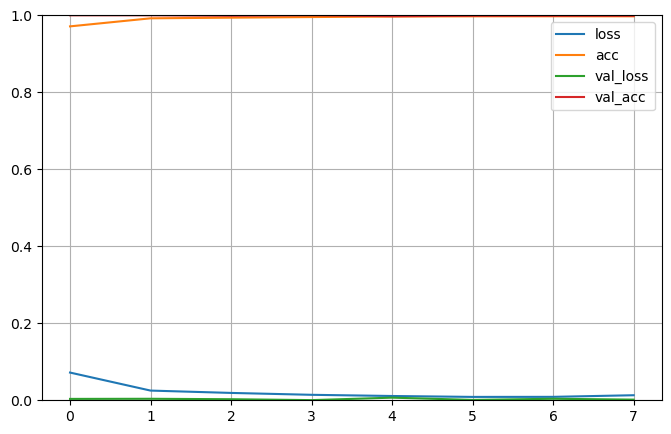

In [16]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
model = k.models.load_model("CNN_Project_Model-08.h5")

In [13]:
test_generator = test_datagen.flow_from_directory(
        test,
        target_size=(128, 128),
        batch_size=31,
        class_mode='binary')

Found 992 images belonging to 2 classes.


In [14]:
eval= model.evaluate(test_generator, steps=32)

32/32 [==============================] - 82s 2s/step - loss: 0.0014 - acc: 0.9990
